<a href="https://colab.research.google.com/github/gunashekar540/fml-lab/blob/main/Untivariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [ ]:
data = pd.read_csv("boston.csv")
data.head(40)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
X = data.drop('medv', axis=1).values
y = data['medv'].values
data.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_rooms)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 5.984744717749342
MSE = 72.42398092899337
RMSE = 8.510228018625199
R_2 = 0.14209474407780442


In [ ]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

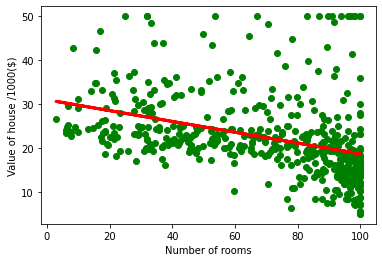

In [ ]:
plt.scatter(X_rooms, y, color='green')
plt.plot(X_rooms, reg.predict(X_rooms), color='red', linewidth=3)
plt.xlabel('Number of rooms')
plt.ylabel('Value of house /1000($)')
plt.show()

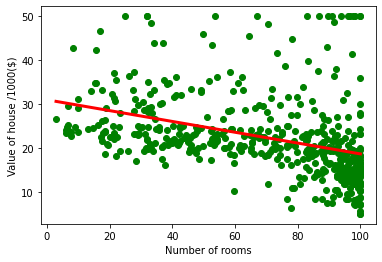

In [ ]:
plt.scatter(X_rooms, y, color='green')
plt.plot(prediction_space, reg.predict(prediction_space), color='red', linewidth=3)
plt.xlabel('Number of rooms')
plt.ylabel('Value of house /1000($)')
plt.show()

In [ ]:
X_rooms = X[:,6]
X_rooms.shape

(506,)

In [ ]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_rooms.shape, y.shape


((506,), (506,))

In [ ]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1, 1)

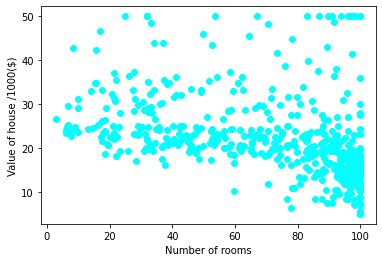

In [ ]:
plt.scatter(X_rooms, y,color='aqua')
plt.xlabel('Number of rooms')
plt.ylabel('Value of house /1000($)')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
